In [1]:
import numpy as np

In [2]:
def svd(A):
    A = np.array(A, dtype=float)
    m, n = A.shape

    #eigen values of A^TA (nxn)
    ATA = A.T @ A
    eigvals, V = np.linalg.eigh(ATA)
    idx = np.argsort(eigvals)[::-1] # descending order
    V = V[:, idx]

    #singular values are sqrt of non-negative eigenvalues
    S = np.sqrt(np.clip(eigvals, 0, None))

    # compute U vectors : ui = (Avi)/si
    U = []
    for i in range(len(S)):
        if S[i] > 1e-10:
            ui = (A @ V[:, i]) / S[i]
            U.append(ui)
        else:
            U.append(np.zeros(m))
    U = np.column_stack(U)

    # U is m*n, S is n, V is n*n
    return U, S, V.T

# Example

In [3]:
A = np.array([[3, 1],
              [1, 3],
              [0, 2]
             ])
U, S, Vt = svd(A)

print("U =\n", U)
print("S =", S)
print("V^T = \n", Vt)
# Reconstruction
A_rec = U @ np.diag(S) @ Vt
print("\nReconstructed A = \n", A_rec)

U =
 [[ 1.07683851 -0.43194058]
 [ 1.26701613  0.22026409]
 [ 0.68105247  0.27318321]]
S = [2.38231918 4.28071902]
V^T = 
 [[ 0.58471028  0.81124219]
 [-0.81124219  0.58471028]]

Reconstructed A = 
 [[ 3.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  3.00000000e+00]
 [-1.26929067e-19  2.00000000e+00]]


Singular values: [95.95991387 17.76103366]


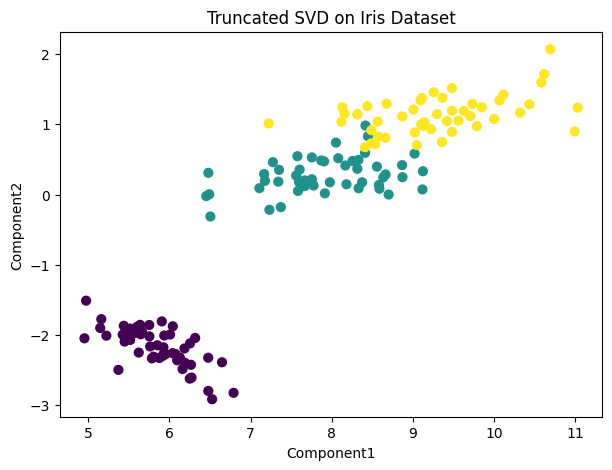

In [4]:
# TruncatedSVD Example using Sklearn(Iris Dataset)
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
# Load dataset 
iris = load_iris()
X = iris.data
y = iris.target
# Apply TruncatedSVD (4D to 2D)
svd = TruncatedSVD(n_components=2, random_state=0)
X_svd = svd.fit_transform(X)
print("Singular values:", svd.singular_values_)
# visualization
plt.figure(figsize=(7,5))
scatter = plt.scatter(X_svd[:,0], X_svd[:,1], c=y, cmap='viridis', s=40)

plt.xlabel("Component1")
plt.ylabel("Component2")
plt.title("Truncated SVD on Iris Dataset")
plt.show()